In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from pandas.plotting import scatter_matrix
import numpy as np

In [3]:
dd=pd.read_csv("carsnew.csv")

In [4]:
dd.head(15)

,Unnamed: 0,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,binaryClass
0,1,chevrolet_chevelle_malibu,17,8,307.0,16,3504,12.0,70,P
1,2,buick_skylark_320,7,8,350.0,34,3693,11.5,70,P
2,3,plymouth_satellite,17,8,318.0,28,3436,11.0,70,P
3,4,amc_rebel_sst,9,8,304.0,28,3433,12.0,70,P
4,5,ford_torino,13,8,302.0,23,3449,10.5,70,P
5,6,ford_galaxie_500,7,8,429.0,41,4341,10.0,70,P
6,7,chevrolet_impala,5,8,454.0,46,4354,9.0,70,P
7,8,plymouth_fury_iii,5,8,440.0,45,4312,8.5,70,P
8,9,pontiac_catalina,5,8,455.0,47,4425,10.0,70,P
9,10,amc_ambassador_dpl,7,8,390.0,39,3850,8.5,70,P


In [7]:
dd['horsepower']=dd['horsepower'].astype(float).astype(int)
dd['acceleration']=dd['acceleration'].astype(float).astype(int)

dd['displacement']=dd['displacement'].astype(float).astype(int)

In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
mpg             406 non-null int64
cylinders       406 non-null int64
displacement    406 non-null int64
horsepower      406 non-null int64
weight          406 non-null int64
acceleration    406 non-null int64
model.year      406 non-null int64
binaryClass     406 non-null object
dtypes: int64(7), object(1)
memory usage: 25.5+ KB


In [6]:

dd=dd.iloc[:,2:10]
dd.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,binaryClass
0,17,8,307,16,3504,12,70,P
1,7,8,350,34,3693,11,70,P
2,17,8,318,28,3436,11,70,P
3,9,8,304,28,3433,12,70,P
4,13,8,302,23,3449,10,70,P


In [9]:
X=dd.iloc[:,:-1]
y=dd.iloc[:,-1]

## Random Forest

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=220)
parameters = {'max_features': [4,7], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
rf = RandomForestClassifier(n_estimators=30,n_jobs=-1,oob_score=True)
gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   14.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=220, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 7], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features=7, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
             oob_score=True, random_state=None, verbose=0, warm_start=False),
 0.93103448275862066)

In [11]:
print (metrics.classification_report(y_test, prediction))

NameError: name 'metrics' is not defined

In [12]:
rf.fit(X_train, y_train)
prediction= rf.predict(X_test)
print (rf)
print (rf.score(X_test, y_test))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.885245901639
Accuracy on test set: 0.885


In [18]:
from sklearn import cross_validation, datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[39,  5],
       [ 9, 69]])

## Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=20, test_size=0.3)
parameters = {"learning_rate":[0.05, 0.1, 0.15],'max_features': [1,2,3,4,5,6,7], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
gbrt = GradientBoostingClassifier(n_estimators=300, random_state=225)
gcv1 = GridSearchCV(gbrt, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X, y)



Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  3.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=220, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=225, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.05, 0.1, 0.15], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [17]:
gcv1.best_score_

0.94334975369458129

In [82]:
print (metrics.classification_report(y_test, prediction1))

             precision    recall  f1-score   support

         70       0.75      0.56      0.64        16
         71       0.33      0.22      0.27         9
         72       0.06      0.17      0.09         6
         73       0.29      0.13      0.18        15
         74       0.00      0.00      0.00         4
         75       0.00      0.00      0.00         5
         76       0.36      0.50      0.42        10
         77       0.20      0.11      0.14         9
         78       0.11      0.10      0.11        10
         79       0.31      0.57      0.40         7
         80       0.36      0.36      0.36        11
         81       0.08      0.20      0.12         5
         82       0.67      0.27      0.38        15

avg / total       0.35      0.28      0.29       122



In [170]:
gbrt.fit(X_train, y_train)
prediction1=gbrt.predict(X_test)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [187]:
feat_labels = X.columns[0:]
importances=gbrt.feature_importances_
indices = np.argsort(importances)[::-1] 
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                        feat_labels[indices[f]],
                        importances[indices[f]]))

 1) displacement                   0.278567
 2) weight                         0.259328
 3) horsepower                     0.153961
 4) mpg                            0.117230
 5) acceleration                   0.100927
 6) model.year                     0.056681
 7) cylinders                      0.033306


In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=prediction1)

array([[35,  9],
       [ 3, 75]])

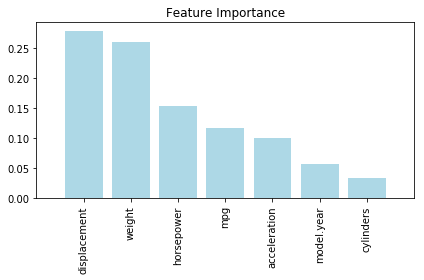

In [195]:
plt.title('Feature Importance') 
plt.bar(range(X_train.shape[1]), importances[indices],
    color='lightblue', align='center') 
plt.xticks(range(X_train.shape[1]),
               feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout() 
plt.show()

# Find structure in data
## t-SNE

<IPython.core.display.Javascript object>


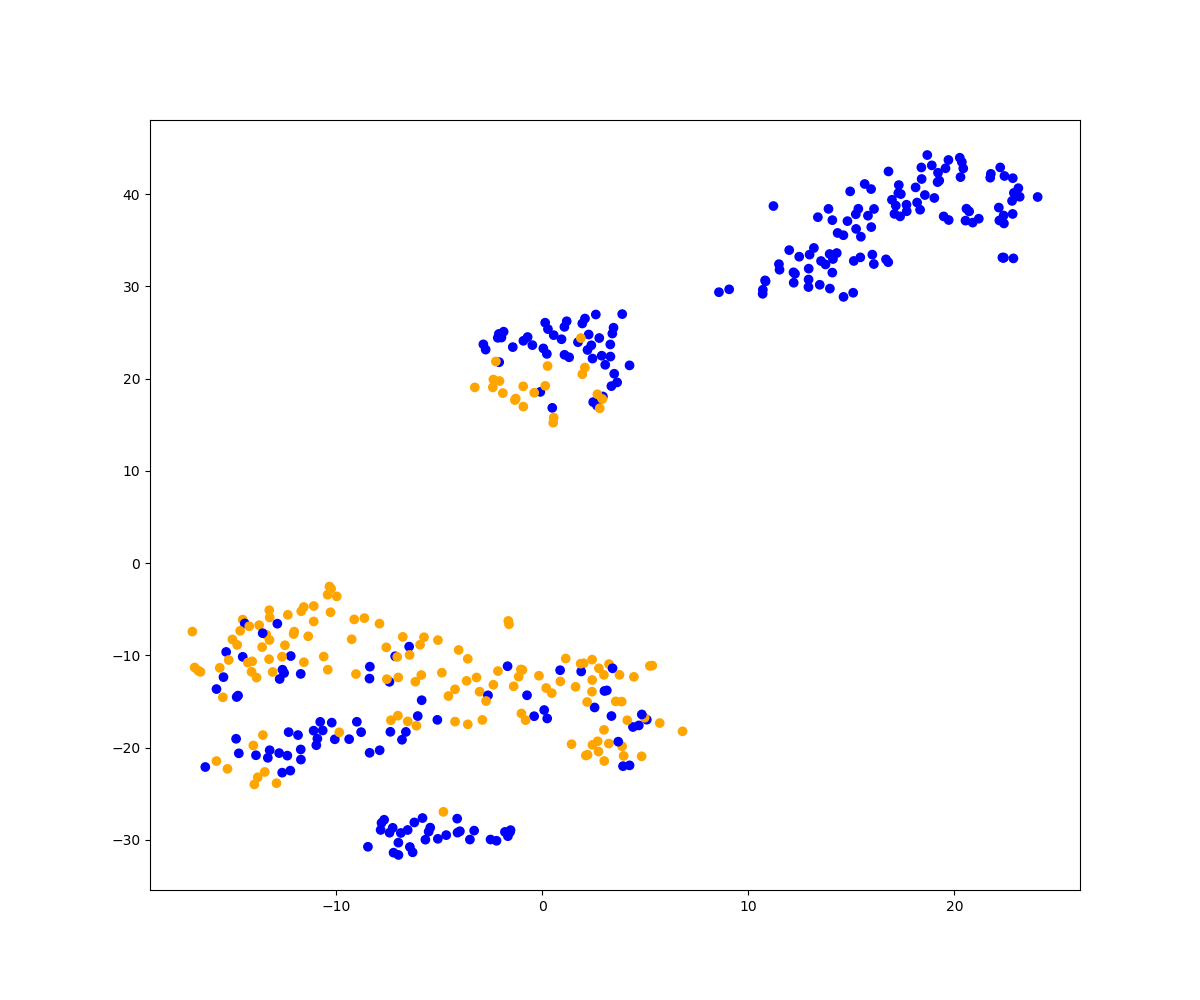

sklearn.manifold.t_sne.TSNE

In [28]:
dd.iloc[:,-1]=pd.factorize(dd.iloc[:,-1])[0]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dd_sc=scale.fit_transform(dd)
X_sc=scale.fit_transform(X)

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, n_components=2)


X_tsne = tsne.fit_transform(X_sc)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}))##
TSNE           



## Clusters

In [15]:
from sklearn.cluster import DBSCAN
X=StandardScaler().fit_transform(X_tsne)
db = DBSCAN(eps=0.3, metric="euclidean", min_samples=10, algorithm="auto").fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=db.labels_, s=30, alpha=0.5, cmap="Spectral")
plt.Circle((0,0.5),2,color='r',fill=False)
plt.xlim(-2,3)
plt.ylim(-2,2);

NameError: name 'StandardScaler' is not defined

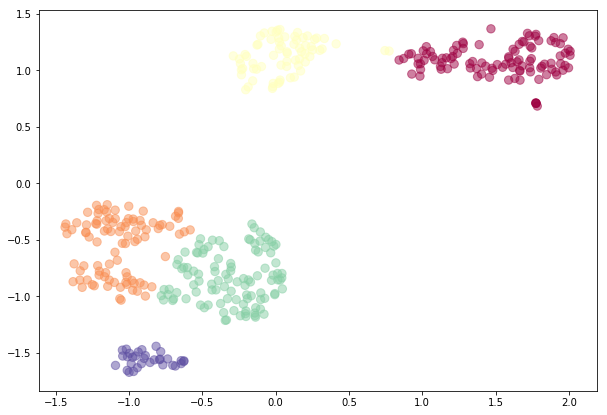

In [152]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=102)
kmeans.fit(X_tsne)
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, s=70, alpha=0.5, cmap="Spectral")


## PCA


In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dd_sc=scale.fit_transform(dd)
X_sc=scale.fit_transform(X)

In [11]:
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components=3)

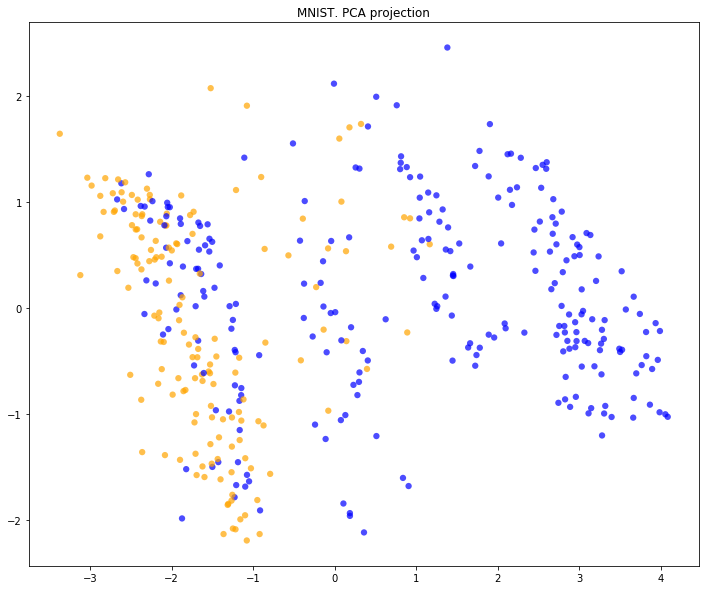

In [12]:
pca = decomposition.PCA(n_components=3)
dd_reduced = pca.fit_transform(X_sc)


plt.figure(figsize=(12,10))
plt.scatter(dd_reduced[:, 0], dd_reduced[:, 1], c=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}), 
            edgecolor='none', alpha=0.7, s=40);

plt.title('MNIST. PCA projection');

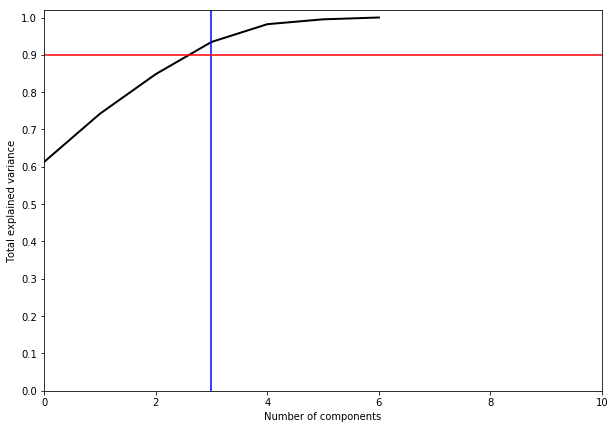

In [13]:
pca = decomposition.PCA().fit(X_sc)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
plt.axhline(0.9, c='r')
plt.show();

### 3d plot of PCA

<IPython.core.display.Javascript object>


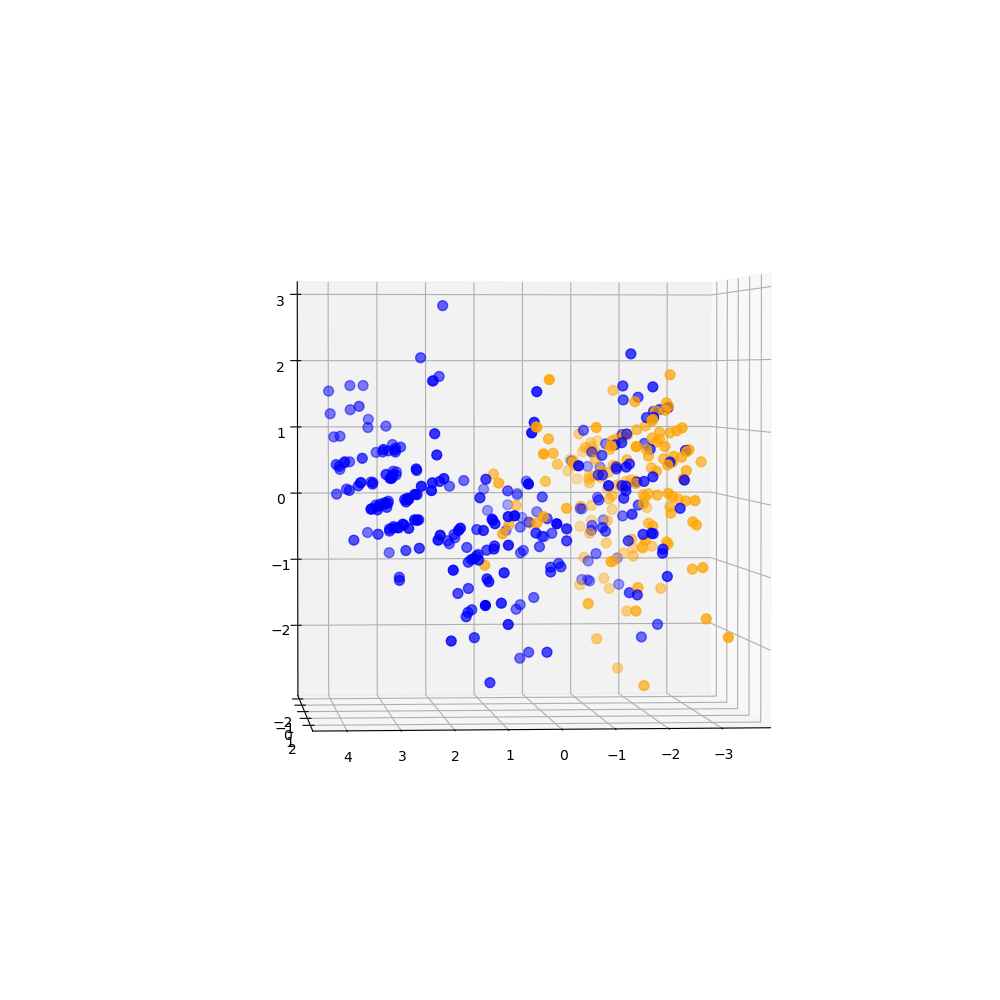

In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dd_reduced[:, 0], dd_reduced[:, 1], dd_reduced[:, 2], c=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}), s=50)
ax.view_init(15, 60)
plt.show()


In [29]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='dhira88', api_key='j57TcvFszvEhmqMuVLwi')
import numpy as np


trace1 = go.Scatter3d(
    x=dd_reduced[:, 0],
    y=dd_reduced[:, 1],
    z=dd_reduced[:, 2],
    mode='markers',
    marker=dict(
        size=7,
        color=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}),
        line=dict(
            
            width=0.2
        ),
        opacity=0.7
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

## MDS

In [121]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
MDS_transformed = MDS(random_state=321).fit_transform(X_sc)



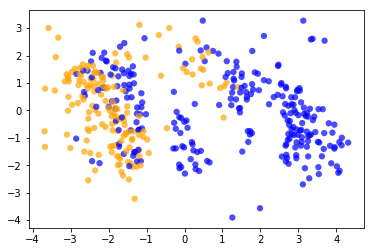

In [122]:
plt.scatter(MDS_transformed[:, 0], MDS_transformed[:, 1], c=dd.iloc[:,-1].map({0: 'blue', 1: 'orange'}), 
            edgecolor='none', alpha=0.7, s=40);